## **"Loan Approval Prediction Using Logistic Regression: Confusion Matrix Analysis**

In [ ]:
#import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load dataset
df = pd.read_csv('/content/loan_data.csv')
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


# Data Preprocessing

## **1. Data inspection and cleaning**

##### **1.1. Identifying and handling Missing Values **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [ ]:
#Handle missing target
df = df.dropna(subset=['loan_status']).reset_index(drop=True)

In [ ]:
#Split data
X = df

In [ ]:
# Identify columns
num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score','loan_status']
cat_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

In [ ]:
#Handle numerical data
# Impute missing values
num_imputer = SimpleImputer(strategy='median', missing_values=np.nan)
X[num_cols] = num_imputer.fit_transform(X[num_cols])

In [ ]:
#Handle Categorical data
# Impute missing values
cat_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

In [ ]:
X.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


##### **1.2. Checking Data Types of Columns in the Dataset **

In [ ]:
# Check data types for all columns
print("\n" + "="*40)
print("Data Types of All Columns:")
print("="*40)
print(X.dtypes)


Data Types of All Columns:
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                    float64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                      float64
previous_loan_defaults_on_file     object
loan_status                       float64
dtype: object


##### **1.3. Identifying and handling Outliers **


In [ ]:
X.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


The columns person_age, person_income, and person_emp_exp contain potential outliers due to unrealistic maximum values. Other columns appear within a reasonable range.

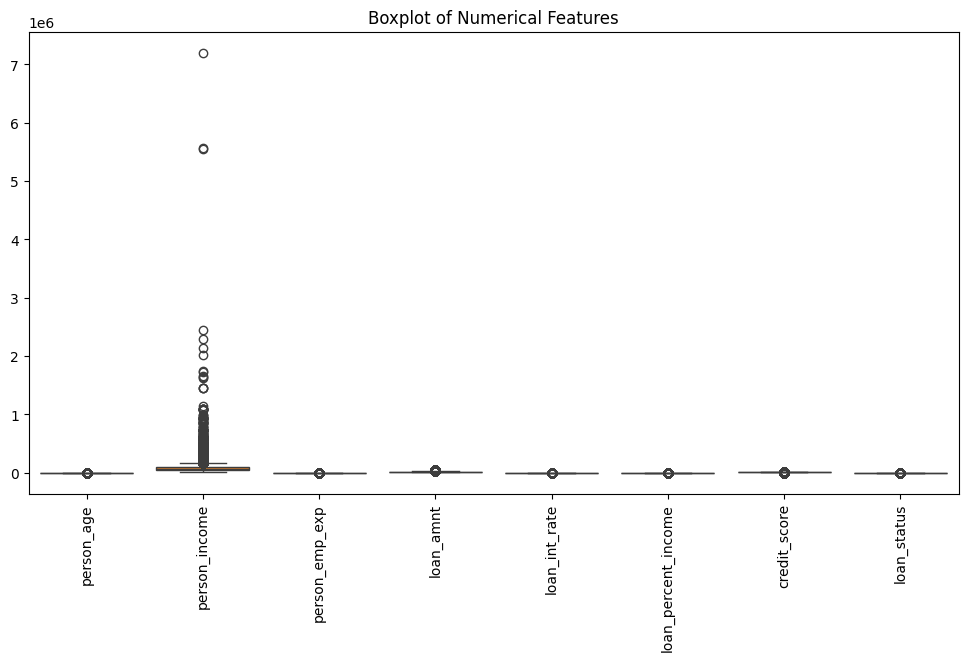

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X[num_cols])
plt.xticks(rotation=90)  # Rotate column names for better visibility
plt.title("Boxplot of Numerical Features")
plt.show()

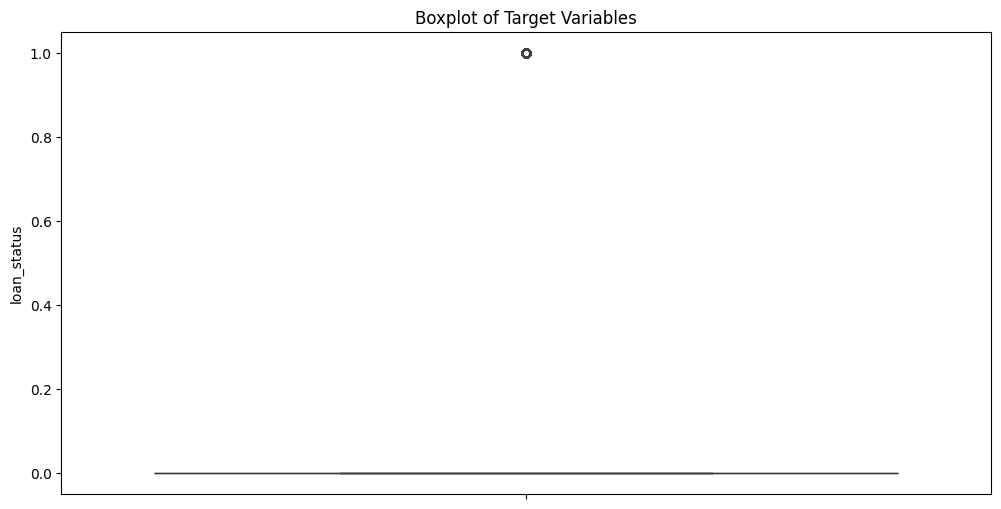

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X['loan_status'])
plt.title("Boxplot of Target Variables")
plt.show()

The columns with outliers are person_age, person_income, and person_emp_exp, as seen from the boxplots and descriptive statistics. The target variable loan_status does not show significant outliers, except for a possible rare class imbalance.

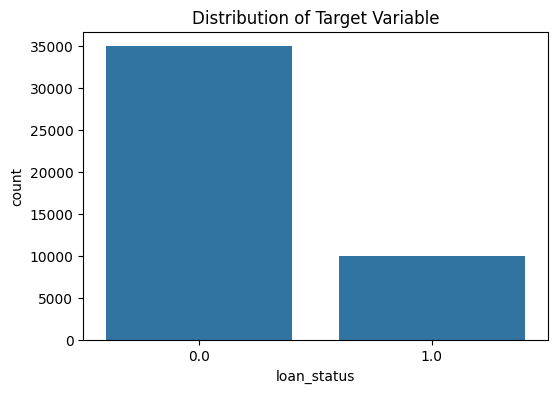

In [ ]:
#Check the Distribution of Target (y)
plt.figure(figsize=(6,4))
sns.countplot(x=X['loan_status'])
plt.title("Distribution of Target Variable")
plt.show()

The count plot shows that the dataset is imbalanced, with significantly more instances of loan_status = 0 (loan not approved) than loan_status = 1 (loan approved).

In [ ]:
X[X["person_age"] >= 95]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125.0,RENT,4800.0,VENTURE,13.57,0.02,3.0,789.0,No,0.0
183,144.0,male,Associate,241424.0,121.0,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807.0,No,0.0
575,123.0,female,High School,97140.0,101.0,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805.0,Yes,0.0
747,123.0,male,Bachelor,94723.0,100.0,RENT,20000.0,VENTURE,11.01,0.21,4.0,714.0,Yes,0.0
32297,144.0,female,Associate,7200766.0,124.0,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850.0,No,0.0
37930,116.0,male,Bachelor,5545545.0,93.0,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708.0,No,0.0
38113,109.0,male,High School,5556399.0,85.0,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792.0,No,0.0


In [ ]:
X['person_income'] = np.log1p(X['person_income'])

In [ ]:
cols = ['person_age','person_emp_exp', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'credit_score']
for col in cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X = X[(X[col] >= lower_bound) & (X[col] <= upper_bound)]

##### **1.4. Identifying and handling duplicate Values **

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Total Duplicate Rows:", duplicate_rows.sum())

Total Duplicate Rows: 0


In [ ]:
print(X.shape)
print(X.isnull().sum())

(38715, 14)
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


## **2. Identifying and Encoding Categorical Features**

In [ ]:
# Define order for ordinal variables
ordinal_mapping = [
    ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'],  # Education Level Order
    ['RENT', 'MORTGAGE', 'OWN']  # Home Ownership Order
]

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping, handle_unknown='use_encoded_value', unknown_value=-1)

# Encode the columns
X[['person_education', 'person_home_ownership']] = ordinal_encoder.fit_transform(X[['person_education', 'person_home_ownership']])

In [ ]:
# Initialize One-Hot Encoder
ohe_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Ensure categorical columns are of type string
X[['person_gender', 'loan_intent', 'previous_loan_defaults_on_file']] = X[['person_gender', 'loan_intent', 'previous_loan_defaults_on_file']].astype(str)

# Fit and transform the categorical columns
encoded_columns = ohe_encoder.fit_transform(X[['person_gender', 'loan_intent', 'previous_loan_defaults_on_file']])

# Convert the transformed array back to a DataFrame with meaningful column names
ohe_feature_names = ohe_encoder.get_feature_names_out(['person_gender', 'loan_intent', 'previous_loan_defaults_on_file'])
X[ohe_feature_names] = encoded_columns

# Drop the original columns (optional)
X.drop(columns=['person_gender', 'loan_intent', 'previous_loan_defaults_on_file'], inplace=True)


In [ ]:
X.isnull().sum()

,0
person_age,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_cred_hist_length,0
credit_score,0


In [ ]:
X.reset_index(drop=True, inplace=True)
X.shape

(38715, 18)

## **3. Data Normalization**

In [ ]:
cols_to_scale = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score']

scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [ ]:
# #Split data
Y = X['loan_status']
X= X.drop('loan_status', axis=1)

In [ ]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Create and train the Linear Regression model
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

In [ ]:
log_reg.coef_

array([[ 1.74707820e-01, -9.92955205e-03, -3.08644624e-01,
        -1.36358403e-01, -7.54525020e-01, -4.44111490e-01,
         1.02545017e+00,  9.97842483e-01, -7.21932140e-03,
        -4.22305878e-01,  8.57273972e-02, -1.12911236e+00,
        -8.32764390e-02, -4.74730063e-01, -9.21567916e-01,
        -1.68882802e+00, -8.73385714e+00]])

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8852


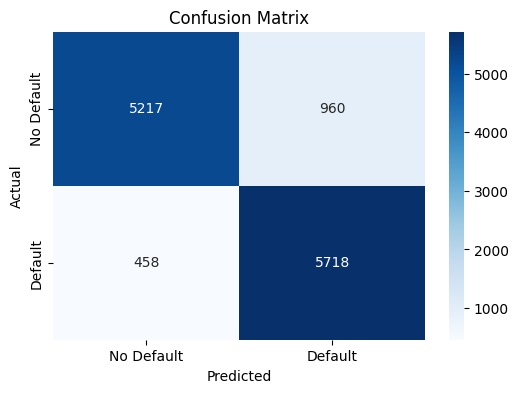

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.84      0.88      6177
         1.0       0.86      0.93      0.89      6176

    accuracy                           0.89     12353
   macro avg       0.89      0.89      0.89     12353
weighted avg       0.89      0.89      0.89     12353

